In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('adult.data.txt',header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "salary"]

In [5]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data['Workclass'].unique() # The rows with '?' is meaningless

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [8]:
data['Martial Status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [9]:
data['Occupation'].unique() # The rows with '?' is meaningless

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
data['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [11]:
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [12]:
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [13]:
data['Country'].unique() # The rows with '?' is meaningless

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

# Data Pre-Processing

## Handling the null values

In [14]:
#  First, mapping the Target values to categorical values 
salay_map = {' <=50K':0,' >50K':1}
data['salary'] = data['salary'].map(salay_map)

In [15]:
data.shape

(32561, 15)

In [16]:
data = data.replace(' ?',np.nan)

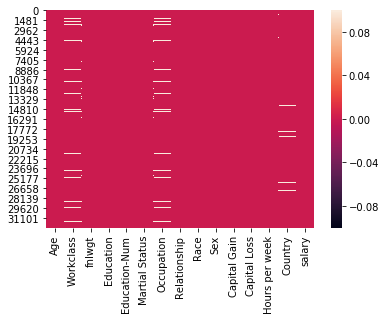

In [17]:
# Create the heatmap using seaborn to visualize the null values in dataset
sns.heatmap(data.isnull(),robust=True)

(array([24720.,     0.,  7841.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

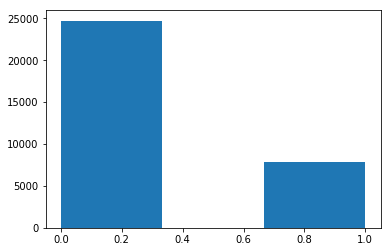

In [18]:
plt.hist(data['salary'],bins=3)

In [19]:
data = data.dropna()

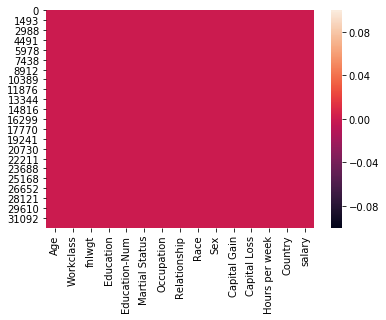

In [20]:
# Create the heatmap using seaborn to visualize the null values in dataset
sns.heatmap(data.isnull(),robust=True)

(array([22654.,     0.,  7508.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

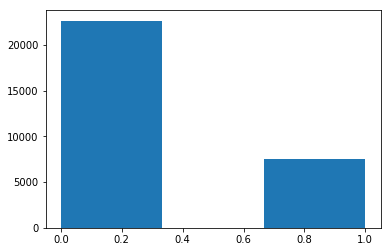

In [21]:
plt.hist(data['salary'],bins=3)

In [22]:
data.shape

(30162, 15)

## Label Encoding on Categorical Values

In [23]:
le_Workclass = LabelEncoder()
le_Education = LabelEncoder()
le_Occupation = LabelEncoder()
le_Country = LabelEncoder()

In [24]:
# create the checkpoint by copying the data in data_copy
data_copy = data.copy(deep=True)

In [25]:
# fit and transform used for Label encoding
data['Workclass'] = le_Workclass.fit_transform(data['Workclass'])
data['Education'] = le_Education.fit_transform(data['Education'])
data['Occupation'] = le_Occupation.fit_transform(data['Occupation'])
data['Country'] = le_Country.fit_transform(data['Country'])

In [26]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,salary
0,39,5,77516,9,13,Never-married,0,Not-in-family,White,Male,2174,0,40,38,0
1,50,4,83311,9,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,38,0
2,38,2,215646,11,9,Divorced,5,Not-in-family,White,Male,0,0,40,38,0
3,53,2,234721,1,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,38,0
4,28,2,338409,9,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,4,0


## Hot - encoding

In [27]:
Martial_Status_dummy = pd.get_dummies(data['Martial Status'],drop_first=True)
Relationship_dummy = pd.get_dummies(data['Relationship'],drop_first=True)
Race_dummy = pd.get_dummies(data['Race'],drop_first=True)
Sex_dummy = pd.get_dummies(data['Sex'],drop_first=True)

In [28]:
# creating the checkpoint
data_copy = data.copy(deep=True)

In [29]:
data = pd.concat([Martial_Status_dummy,Relationship_dummy,Race_dummy,Sex_dummy,data],axis=1)

In [30]:
data.drop(['Martial Status','Relationship','Race','Sex'],axis=1,inplace=True)

In [31]:
data.head()

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,...,Workclass,fnlwgt,Education,Education-Num,Occupation,Capital Gain,Capital Loss,Hours per week,Country,salary
0,0,0,0,1,0,0,1,0,0,0,...,5,77516,9,13,0,2174,0,40,38,0
1,0,1,0,0,0,0,0,0,0,0,...,4,83311,9,13,3,0,0,13,38,0
2,0,0,0,0,0,0,1,0,0,0,...,2,215646,11,9,5,0,0,40,38,0
3,0,1,0,0,0,0,0,0,0,0,...,2,234721,1,7,5,0,0,40,38,0
4,0,1,0,0,0,0,0,0,0,0,...,2,338409,9,13,9,0,0,40,4,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 27 columns):
 Married-AF-spouse        30162 non-null uint8
 Married-civ-spouse       30162 non-null uint8
 Married-spouse-absent    30162 non-null uint8
 Never-married            30162 non-null uint8
 Separated                30162 non-null uint8
 Widowed                  30162 non-null uint8
 Not-in-family            30162 non-null uint8
 Other-relative           30162 non-null uint8
 Own-child                30162 non-null uint8
 Unmarried                30162 non-null uint8
 Wife                     30162 non-null uint8
 Asian-Pac-Islander       30162 non-null uint8
 Black                    30162 non-null uint8
 Other                    30162 non-null uint8
 White                    30162 non-null uint8
 Male                     30162 non-null uint8
Age                       30162 non-null int64
Workclass                 30162 non-null int32
fnlwgt                    30162 non-null int6

In [33]:
data.columns

Index([' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Male', 'Age',
       'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Occupation',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'salary'],
      dtype='object')

In [34]:
# Columns to be standardised
data_to_be_scaled = data[['Age',
       'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Occupation',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country']]

In [35]:
# Columns not to be standardised
data_not_to_be_scaled = data[[' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Male','salary']]

In [36]:
scalar = StandardScaler()

In [37]:
std_data = scalar.fit_transform(data_to_be_scaled)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
std_data.shape

(30162, 10)

In [39]:
data_not_to_be_scaled.shape

(30162, 17)

In [40]:
# Horizontally stacking the standardised and not standardised columns
data = pd.DataFrame(np.hstack([data_not_to_be_scaled,std_data]))

In [41]:
# Assigning the columns according to order it was horizaontally stacked
data.columns = [' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Male','salary','Age',
       'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Occupation',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country']

In [42]:
# Re-arranging the columns of data sp that 'salary' column comes last
data = data[[' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Widowed', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Male','Age',
       'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Occupation',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country','salary']]

In [43]:
data.head()

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,...,Workclass,fnlwgt,Education,Education-Num,Occupation,Capital Gain,Capital Loss,Hours per week,Country,salary
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.936000,-1.062722,-0.349865,1.128918,-1.479055,0.146092,-0.218586,-0.077734,0.264924,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.887682,-1.007871,-0.349865,1.128918,-0.734545,-0.147445,-0.218586,-2.331531,0.264924,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.208955,0.244693,0.174763,-0.439738,-0.238206,-0.147445,-0.218586,-0.077734,0.264924,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.208955,0.425240,-2.448375,-1.224066,-0.238206,-0.147445,-0.218586,-0.077734,0.264924,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.208955,1.406658,-0.349865,1.128918,0.754473,-0.147445,-0.218586,-0.077734,-5.304034,0.0


# Splitting the data in training and test

In [44]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [45]:
X.head()

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Not-in-family,Other-relative,Own-child,Unmarried,...,Age,Workclass,fnlwgt,Education,Education-Num,Occupation,Capital Gain,Capital Loss,Hours per week,Country
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.042796,2.936000,-1.062722,-0.349865,1.128918,-1.479055,0.146092,-0.218586,-0.077734,0.264924
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.880288,1.887682,-1.007871,-0.349865,1.128918,-0.734545,-0.147445,-0.218586,-2.331531,0.264924
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.033340,-0.208955,0.244693,0.174763,-0.439738,-0.238206,-0.147445,-0.218586,-0.077734,0.264924
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.108695,-0.208955,0.425240,-2.448375,-1.224066,-0.238206,-0.147445,-0.218586,-0.077734,0.264924
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.794697,-0.208955,1.406658,-0.349865,1.128918,0.754473,-0.147445,-0.218586,-0.077734,-5.304034


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Applying Models

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve

In [48]:
params = {'penalty':['l1','l2'],'C':np.linspace(start=0.001,stop=2,num=30)}

In [49]:
grid = GridSearchCV(LogisticRegression(random_state=10),params,refit=True,verbose=4)

In [50]:
grid.fit(X_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7769766285430134, total=   0.1s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7742136018898421, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ..... C=0.001, penalty=l1, score=0.772444665506093, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.8218547986076579, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: 

[CV] ..... C=0.001, penalty=l2, score=0.824692279000373, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.8194478985327033, total=   0.0s
[CV] C=0.06993103448275863, penalty=l1 ...............................
[CV]  C=0.06993103448275863, penalty=l1, score=0.836399801093983, total=   0.2s
[CV] C=0.06993103448275863, penalty=l1 ...............................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.06993103448275863, penalty=l1, score=0.8445853537237349, total=   0.2s
[CV] C=0.06993103448275863, penalty=l1 ...............................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.06993103448275863, penalty=l1, score=0.8385973638398408, total=   0.1s
[CV] C=0.06993103448275863, penalty=l2 ...............................
[CV]  C=0.06993103448275863, penalty=l2, score=0.8351566384883142, total=   0.0s
[CV] C=0.06993103448275863, penalty=l2 ...............................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.06993103448275863, penalty=l2, score=0.845580007459903, total=   0.1s
[CV] C=0.06993103448275863, penalty=l2 ...............................
[CV]  C=0.06993103448275863, penalty=l2, score=0.838970405371798, total=   0.0s
[CV] C=0.13886206896551725, penalty=l1 ...............................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.13886206896551725, penalty=l1, score=0.8360268523122825, total=   0.3s
[CV] C=0.13886206896551725, penalty=l1 ...............................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.13886206896551725, penalty=l1, score=0.8443366902896929, total=   0.3s
[CV] C=0.13886206896551725, penalty=l1 ...............................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.13886206896551725, penalty=l1, score=0.8390947525491171, total=   0.4s
[CV] C=0.13886206896551725, penalty=l2 ...............................
[CV]  C=0.13886206896551725, penalty=l2, score=0.8357782197911486, total=   0.0s
[CV] C=0.13886206896551725, penalty=l2 ...............................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.13886206896551725, penalty=l2, score=0.845082680591819, total=   0.1s
[CV] C=0.13886206896551725, penalty=l2 ...............................
[CV]  C=0.13886206896551725, penalty=l2, score=0.8390947525491171, total=   0.0s
[CV] C=0.2077931034482759, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2077931034482759, penalty=l1, score=0.8360268523122825, total=   0.3s
[CV] C=0.2077931034482759, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2077931034482759, penalty=l1, score=0.844709685440756, total=   0.4s
[CV] C=0.2077931034482759, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2077931034482759, penalty=l1, score=0.8383486694852027, total=   0.4s
[CV] C=0.2077931034482759, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2077931034482759, penalty=l2, score=0.8360268523122825, total=   0.1s
[CV] C=0.2077931034482759, penalty=l2 ................................
[CV]  C=0.2077931034482759, penalty=l2, score=0.845082680591819, total=   0.1s
[CV] C=0.2077931034482759, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2077931034482759, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=0.2767241379310345, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2767241379310345, penalty=l1, score=0.8361511685728493, total=   0.6s
[CV] C=0.2767241379310345, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2767241379310345, penalty=l1, score=0.844834017157777, total=   0.6s
[CV] C=0.2767241379310345, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2767241379310345, penalty=l1, score=0.8382243223078836, total=   0.7s
[CV] C=0.2767241379310345, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2767241379310345, penalty=l2, score=0.8361511685728493, total=   0.1s
[CV] C=0.2767241379310345, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2767241379310345, penalty=l2, score=0.8449583488747979, total=   0.1s
[CV] C=0.2767241379310345, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.2767241379310345, penalty=l2, score=0.8383486694852027, total=   0.1s
[CV] C=0.3456551724137931, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.3456551724137931, penalty=l1, score=0.8362754848334162, total=   0.8s
[CV] C=0.3456551724137931, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.3456551724137931, penalty=l1, score=0.845082680591819, total=   0.9s
[CV] C=0.3456551724137931, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.3456551724137931, penalty=l1, score=0.8382243223078836, total=   0.8s
[CV] C=0.3456551724137931, penalty=l2 ................................
[CV]  C=0.3456551724137931, penalty=l2, score=0.83652411735455, total=   0.1s
[CV] C=0.3456551724137931, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=0.3456551724137931, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=0.3456551724137931, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.3456551724137931, penalty=l2, score=0.8385973638398408, total=   0.2s
[CV] C=0.4145862068965518, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4145862068965518, penalty=l1, score=0.83652411735455, total=   1.0s
[CV] C=0.4145862068965518, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4145862068965518, penalty=l1, score=0.845331344025861, total=   0.8s
[CV] C=0.4145862068965518, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4145862068965518, penalty=l1, score=0.8382243223078836, total=   0.7s
[CV] C=0.4145862068965518, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4145862068965518, penalty=l2, score=0.83652411735455, total=   0.1s
[CV] C=0.4145862068965518, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4145862068965518, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=0.4145862068965518, penalty=l2 ................................
[CV]  C=0.4145862068965518, penalty=l2, score=0.8384730166625217, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.4835172413793104, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4835172413793104, penalty=l1, score=0.83652411735455, total=   1.0s
[CV] C=0.4835172413793104, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4835172413793104, penalty=l1, score=0.84520701230884, total=   0.9s
[CV] C=0.4835172413793104, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4835172413793104, penalty=l1, score=0.8382243223078836, total=   0.8s
[CV] C=0.4835172413793104, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4835172413793104, penalty=l2, score=0.83652411735455, total=   0.2s
[CV] C=0.4835172413793104, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4835172413793104, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=0.4835172413793104, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.4835172413793104, penalty=l2, score=0.8383486694852027, total=   0.1s
[CV] C=0.552448275862069, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.552448275862069, penalty=l1, score=0.836399801093983, total=   0.8s
[CV] C=0.552448275862069, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.552448275862069, penalty=l1, score=0.84520701230884, total=   0.8s
[CV] C=0.552448275862069, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.552448275862069, penalty=l1, score=0.8379756279532454, total=   0.7s
[CV] C=0.552448275862069, penalty=l2 .................................
[CV]  C=0.552448275862069, penalty=l2, score=0.83652411735455, total=   0.1s
[CV] C=0.552448275862069, penalty=l2 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.552448275862069, penalty=l2, score=0.844709685440756, total=   0.1s
[CV] C=0.552448275862069, penalty=l2 .................................
[CV]  C=0.552448275862069, penalty=l2, score=0.8382243223078836, total=   0.1s
[CV] C=0.6213793103448276, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6213793103448276, penalty=l1, score=0.836399801093983, total=   0.7s
[CV] C=0.6213793103448276, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6213793103448276, penalty=l1, score=0.84520701230884, total=   1.0s
[CV] C=0.6213793103448276, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6213793103448276, penalty=l1, score=0.8380999751305646, total=   0.8s
[CV] C=0.6213793103448276, penalty=l2 ................................
[CV]  C=0.6213793103448276, penalty=l2, score=0.8366484336151169, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.6213793103448276, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6213793103448276, penalty=l2, score=0.844709685440756, total=   0.2s
[CV] C=0.6213793103448276, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6213793103448276, penalty=l2, score=0.8383486694852027, total=   0.2s
[CV] C=0.6903103448275862, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6903103448275862, penalty=l1, score=0.836399801093983, total=   0.9s
[CV] C=0.6903103448275862, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6903103448275862, penalty=l1, score=0.84520701230884, total=   0.9s
[CV] C=0.6903103448275862, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.6903103448275862, penalty=l1, score=0.8379756279532454, total=   0.9s
[CV] C=0.6903103448275862, penalty=l2 ................................
[CV]  C=0.6903103448275862, penalty=l2, score=0.83652411735455, total=   0.1s
[CV] C=0.6903103448275862, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=0.6903103448275862, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=0.6903103448275862, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=0.6903103448275862, penalty=l2, score=0.8384730166625217, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.7592413793103449, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.7592413793103449, penalty=l1, score=0.836399801093983, total=   0.7s
[CV] C=0.7592413793103449, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.7592413793103449, penalty=l1, score=0.845331344025861, total=   0.8s
[CV] C=0.7592413793103449, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.7592413793103449, penalty=l1, score=0.8382243223078836, total=   0.7s
[CV] C=0.7592413793103449, penalty=l2 ................................
[CV]  C=0.7592413793103449, penalty=l2, score=0.83652411735455, total=   0.1s
[CV] C=0.7592413793103449, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.7592413793103449, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=0.7592413793103449, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.7592413793103449, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=0.8281724137931036, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8281724137931036, penalty=l1, score=0.836399801093983, total=   0.6s
[CV] C=0.8281724137931036, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8281724137931036, penalty=l1, score=0.845331344025861, total=   0.8s
[CV] C=0.8281724137931036, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8281724137931036, penalty=l1, score=0.8382243223078836, total=   0.7s
[CV] C=0.8281724137931036, penalty=l2 ................................
[CV]  C=0.8281724137931036, penalty=l2, score=0.83652411735455, total=   0.1s
[CV] C=0.8281724137931036, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8281724137931036, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=0.8281724137931036, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8281724137931036, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=0.8971034482758622, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8971034482758622, penalty=l1, score=0.83652411735455, total=   0.6s
[CV] C=0.8971034482758622, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8971034482758622, penalty=l1, score=0.84520701230884, total=   0.7s
[CV] C=0.8971034482758622, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.8971034482758622, penalty=l1, score=0.8382243223078836, total=   0.7s
[CV] C=0.8971034482758622, penalty=l2 ................................
[CV]  C=0.8971034482758622, penalty=l2, score=0.836399801093983, total=   0.1s
[CV] C=0.8971034482758622, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=0.8971034482758622, penalty=l2, score=0.8445853537237349, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.8971034482758622, penalty=l2 ................................
[CV]  C=0.8971034482758622, penalty=l2, score=0.8385973638398408, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=0.9660344827586208, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.9660344827586208, penalty=l1, score=0.83652411735455, total=   0.7s
[CV] C=0.9660344827586208, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.9660344827586208, penalty=l1, score=0.845082680591819, total=   0.8s
[CV] C=0.9660344827586208, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.9660344827586208, penalty=l1, score=0.8382243223078836, total=   0.9s
[CV] C=0.9660344827586208, penalty=l2 ................................
[CV]  C=0.9660344827586208, penalty=l2, score=0.8367727498756837, total=   0.1s
[CV] C=0.9660344827586208, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.9660344827586208, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=0.9660344827586208, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=0.9660344827586208, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.0349655172413792, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.0349655172413792, penalty=l1, score=0.83652411735455, total=   0.6s
[CV] C=1.0349655172413792, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.0349655172413792, penalty=l1, score=0.845082680591819, total=   0.8s
[CV] C=1.0349655172413792, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.0349655172413792, penalty=l1, score=0.8382243223078836, total=   1.1s
[CV] C=1.0349655172413792, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.0349655172413792, penalty=l2, score=0.8367727498756837, total=   0.1s
[CV] C=1.0349655172413792, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.0349655172413792, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=1.0349655172413792, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.0349655172413792, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.103896551724138, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.103896551724138, penalty=l1, score=0.8367727498756837, total=   0.6s
[CV] C=1.103896551724138, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.103896551724138, penalty=l1, score=0.845082680591819, total=   0.7s
[CV] C=1.103896551724138, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.103896551724138, penalty=l1, score=0.8382243223078836, total=   1.0s
[CV] C=1.103896551724138, penalty=l2 .................................
[CV]  C=1.103896551724138, penalty=l2, score=0.8367727498756837, total=   0.1s
[CV] C=1.103896551724138, penalty=l2 .................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.103896551724138, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=1.103896551724138, penalty=l2 .................................
[CV]  C=1.103896551724138, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.1728275862068966, penalty=l1 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.1728275862068966, penalty=l1, score=0.8367727498756837, total=   0.6s
[CV] C=1.1728275862068966, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.1728275862068966, penalty=l1, score=0.8449583488747979, total=   0.8s
[CV] C=1.1728275862068966, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.1728275862068966, penalty=l1, score=0.8382243223078836, total=   1.0s
[CV] C=1.1728275862068966, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.1728275862068966, penalty=l2, score=0.8367727498756837, total=   0.1s
[CV] C=1.1728275862068966, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.1728275862068966, penalty=l2, score=0.8445853537237349, total=   0.1s
[CV] C=1.1728275862068966, penalty=l2 ................................
[CV]  C=1.1728275862068966, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.2417586206896551, penalty=l1 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.2417586206896551, penalty=l1, score=0.8367727498756837, total=   0.8s
[CV] C=1.2417586206896551, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.2417586206896551, penalty=l1, score=0.8449583488747979, total=   0.7s
[CV] C=1.2417586206896551, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.2417586206896551, penalty=l1, score=0.8383486694852027, total=   1.0s
[CV] C=1.2417586206896551, penalty=l2 ................................
[CV]  C=1.2417586206896551, penalty=l2, score=0.8367727498756837, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.2417586206896551, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.2417586206896551, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.2417586206896551, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.2417586206896551, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.3106896551724139, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.3106896551724139, penalty=l1, score=0.8367727498756837, total=   0.8s
[CV] C=1.3106896551724139, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.3106896551724139, penalty=l1, score=0.8449583488747979, total=   0.7s
[CV] C=1.3106896551724139, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.3106896551724139, penalty=l1, score=0.8383486694852027, total=   1.1s
[CV] C=1.3106896551724139, penalty=l2 ................................
[CV]  C=1.3106896551724139, penalty=l2, score=0.8367727498756837, total=   0.1s
[CV] C=1.3106896551724139, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=1.3106896551724139, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.3106896551724139, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.3106896551724139, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.3796206896551724, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.3796206896551724, penalty=l1, score=0.8367727498756837, total=   0.9s
[CV] C=1.3796206896551724, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.3796206896551724, penalty=l1, score=0.8449583488747979, total=   0.8s
[CV] C=1.3796206896551724, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.3796206896551724, penalty=l1, score=0.8383486694852027, total=   1.0s
[CV] C=1.3796206896551724, penalty=l2 ................................
[CV]  C=1.3796206896551724, penalty=l2, score=0.8367727498756837, total=   0.1s
[CV] C=1.3796206896551724, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=1.3796206896551724, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.3796206896551724, penalty=l2 ................................
[CV]  C=1.3796206896551724, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.448551724137931, penalty=l1 .................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.448551724137931, penalty=l1, score=0.8367727498756837, total=   0.9s
[CV] C=1.448551724137931, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.448551724137931, penalty=l1, score=0.8449583488747979, total=   0.7s
[CV] C=1.448551724137931, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.448551724137931, penalty=l1, score=0.8383486694852027, total=   1.0s
[CV] C=1.448551724137931, penalty=l2 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.448551724137931, penalty=l2, score=0.8368970661362506, total=   0.1s
[CV] C=1.448551724137931, penalty=l2 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.448551724137931, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.448551724137931, penalty=l2 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.448551724137931, penalty=l2, score=0.8385973638398408, total=   0.2s
[CV] C=1.5174827586206896, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5174827586206896, penalty=l1, score=0.8367727498756837, total=   0.9s
[CV] C=1.5174827586206896, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5174827586206896, penalty=l1, score=0.8449583488747979, total=   0.7s
[CV] C=1.5174827586206896, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5174827586206896, penalty=l1, score=0.8383486694852027, total=   1.1s
[CV] C=1.5174827586206896, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5174827586206896, penalty=l2, score=0.8368970661362506, total=   0.1s
[CV] C=1.5174827586206896, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5174827586206896, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.5174827586206896, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5174827586206896, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.5864137931034483, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5864137931034483, penalty=l1, score=0.8367727498756837, total=   1.0s
[CV] C=1.5864137931034483, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5864137931034483, penalty=l1, score=0.8449583488747979, total=   0.7s
[CV] C=1.5864137931034483, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5864137931034483, penalty=l1, score=0.8383486694852027, total=   1.1s
[CV] C=1.5864137931034483, penalty=l2 ................................
[CV]  C=1.5864137931034483, penalty=l2, score=0.8368970661362506, total=   0.1s
[CV] C=1.5864137931034483, penalty=l2 ................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=1.5864137931034483, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.5864137931034483, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.5864137931034483, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.655344827586207, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.655344827586207, penalty=l1, score=0.8367727498756837, total=   1.1s
[CV] C=1.655344827586207, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.655344827586207, penalty=l1, score=0.8449583488747979, total=   0.9s
[CV] C=1.655344827586207, penalty=l1 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.655344827586207, penalty=l1, score=0.8383486694852027, total=   1.2s
[CV] C=1.655344827586207, penalty=l2 .................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.655344827586207, penalty=l2, score=0.8368970661362506, total=   0.2s
[CV] C=1.655344827586207, penalty=l2 .................................
[CV]  C=1.655344827586207, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.655344827586207, penalty=l2 .................................

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV]  C=1.655344827586207, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.7242758620689655, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7242758620689655, penalty=l1, score=0.8367727498756837, total=   1.1s
[CV] C=1.7242758620689655, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7242758620689655, penalty=l1, score=0.8449583488747979, total=   0.8s
[CV] C=1.7242758620689655, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7242758620689655, penalty=l1, score=0.8383486694852027, total=   1.2s
[CV] C=1.7242758620689655, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7242758620689655, penalty=l2, score=0.8368970661362506, total=   0.1s
[CV] C=1.7242758620689655, penalty=l2 ................................
[CV]  C=1.7242758620689655, penalty=l2, score=0.844834017157777, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.7242758620689655, penalty=l2 ................................
[CV]  C=1.7242758620689655, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.7932068965517243, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7932068965517243, penalty=l1, score=0.8367727498756837, total=   1.1s
[CV] C=1.7932068965517243, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7932068965517243, penalty=l1, score=0.8449583488747979, total=   0.9s
[CV] C=1.7932068965517243, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7932068965517243, penalty=l1, score=0.8383486694852027, total=   1.2s
[CV] C=1.7932068965517243, penalty=l2 ................................
[CV]  C=1.7932068965517243, penalty=l2, score=0.8368970661362506, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.7932068965517243, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7932068965517243, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.7932068965517243, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.7932068965517243, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.8621379310344828, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.8621379310344828, penalty=l1, score=0.8367727498756837, total=   1.2s
[CV] C=1.8621379310344828, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.8621379310344828, penalty=l1, score=0.8449583488747979, total=   0.7s
[CV] C=1.8621379310344828, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.8621379310344828, penalty=l1, score=0.8383486694852027, total=   1.0s
[CV] C=1.8621379310344828, penalty=l2 ................................
[CV]  C=1.8621379310344828, penalty=l2, score=0.8368970661362506, total=   0.1s

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



[CV] C=1.8621379310344828, penalty=l2 ................................
[CV]  C=1.8621379310344828, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=1.8621379310344828, penalty=l2 ................................
[CV]  C=1.8621379310344828, penalty=l2, score=0.8385973638398408, total=   0.1s
[CV] C=1.9310689655172415, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.9310689655172415, penalty=l1, score=0.8366484336151169, total=   1.3s
[CV] C=1.9310689655172415, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.9310689655172415, penalty=l1, score=0.8449583488747979, total=   1.5s
[CV] C=1.9310689655172415, penalty=l1 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.9310689655172415, penalty=l1, score=0.8383486694852027, total=   1.2s
[CV] C=1.9310689655172415, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.9310689655172415, penalty=l2, score=0.8368970661362506, total=   0.2s
[CV] C=1.9310689655172415, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.9310689655172415, penalty=l2, score=0.844834017157777, total=   0.2s
[CV] C=1.9310689655172415, penalty=l2 ................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  C=1.9310689655172415, penalty=l2, score=0.8385973638398408, total=   0.2s
[CV] C=2.0, penalty=l1 ...............................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=2.0, penalty=l1, score=0.8366484336151169, total=   1.3s
[CV] C=2.0, penalty=l1 ...............................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=2.0, penalty=l1, score=0.8449583488747979, total=   1.3s
[CV] C=2.0, penalty=l1 ...............................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=2.0, penalty=l1, score=0.8383486694852027, total=   1.2s
[CV] C=2.0, penalty=l2 ...............................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=2.0, penalty=l2, score=0.8368970661362506, total=   0.1s
[CV] C=2.0, penalty=l2 ...............................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ....... C=2.0, penalty=l2, score=0.844834017157777, total=   0.1s
[CV] C=2.0, penalty=l2 ...............................................


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ...... C=2.0, penalty=l2, score=0.8385973638398408, total=   0.2s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.7min finished
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-03, 6.99310e-02, 1.38862e-01, 2.07793e-01, 2.76724e-01,
       3.45655e-01, 4.14586e-01, 4.83517e-01, 5.52448e-01, 6.21379e-01,
       6.90310e-01, 7.59241e-01, 8.28172e-01, 8.97103e-01, 9.66034e-01,
       1.03497e+00, 1.10390e+00, 1.17283e+00, 1.24176e+00, 1.31069e+00,
       1.37962e+00, 1.44855e+00, 1.51748e+00, 1.58641e+00, 1.65534e+00,
       1.72428e+00, 1.79321e+00, 1.86214e+00, 1.93107e+00, 2.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [51]:
best_model_logistic_regression = grid.best_estimator_

In [52]:
y_pred = best_model_logistic_regression.predict(X_test)

In [53]:
y_pred_lr = y_pred
y_test_lr = y_test

In [54]:
accuracy_score(y_test_lr,y_pred_lr)

0.840046411403945

In [55]:
confusion_matrix(y_test_lr,y_pred_lr)

array([[4189,  320],
       [ 645,  879]], dtype=int64)

# Random Forest Model

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [57]:
scores = cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=10,n_jobs=-1) #Cross Validation
scores

array([0.84009942, 0.84921292, 0.84424192, 0.84299917, 0.83961873,
       0.86235489, 0.85406302, 0.84452736, 0.83955224, 0.83830846])

In [58]:
n_estimators = [10,100,500,1000,2000]
criterion = ['gini','entropy']
min_samples_split = [2,10,20,50,100]
max_depth = [20,30,40,50,None]

In [59]:
#Model Training using RamdomSearch and cross-validation
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion, 'min_samples_split':min_samples_split, 'max_depth': max_depth}
rf= RandomForestClassifier()
rf_g= RandomizedSearchCV(rf, param_grid, cv=5, verbose=2, n_jobs=-1)
rf_g.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 100, 500, 1000, 2000], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [20, 30, 40, 50, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [60]:
#Lets find out the best setting of the hyperparameters
best_model_randomForest = rf_g.best_estimator_

In [61]:
y_pred = best_model_randomForest.predict(X_test)

In [62]:
y_pred_rf = y_pred
y_test_rf = y_test

In [63]:
accuracy_score(y_test_rf,y_pred_rf)

0.8634178683905188

In [64]:
confusion_matrix(y_test_rf,y_pred_rf)

array([[4241,  268],
       [ 556,  968]], dtype=int64)

## Artificial Neural Network

In [65]:
from keras import layers,models

Using TensorFlow backend.


### Determining the Principal Component using PCA before feeding to ANN

#### PCA Analyses

In [66]:
from sklearn.decomposition import PCA

In [67]:
X_PCA = data.iloc[:,:-1]
y_PCA = data.iloc[:,-1]

In [68]:
cov = np.cov(X_PCA.T)
cov

array([[ 6.95778620e-04, -3.24678222e-04, -8.54112635e-06,
        -2.24516202e-04, -2.16759936e-05, -1.90905716e-05,
        -1.78347952e-04,  1.26336120e-05, -6.99383041e-05,
        -7.41462104e-05,  2.99097713e-04, -2.06602921e-05,
        -3.18725815e-05, -5.33243294e-06,  6.44673664e-05,
        -1.72055879e-04, -4.11956941e-04, -1.10730051e-04,
        -2.39527381e-05,  9.55895688e-05,  5.88300481e-06,
        -1.00028628e-04, -6.99893771e-05, -1.52193411e-04,
         1.92194059e-04,  1.84456842e-04],
       [-3.24678222e-04,  2.48873588e-01, -5.72052105e-03,
        -1.50372399e-01, -1.45177548e-02, -1.27861376e-02,
        -1.18986488e-01, -9.83237427e-03, -6.62963371e-02,
        -4.96603071e-02,  2.45469575e-02,  8.17209913e-04,
        -1.81562284e-02, -5.21163701e-04,  1.86680519e-02,
         1.02168217e-01,  1.53818521e-01,  3.92241864e-02,
        -1.45427832e-02,  5.07567724e-03,  4.02780905e-02,
         1.40019371e-02,  4.20638946e-02,  4.05925375e-02,
         1.11

In [69]:
eig_val,eig_vec = np.linalg.eig(cov)

In [70]:
eig_val

array([1.58419549e+00, 1.24905723e+00, 1.06586905e+00, 1.03144903e+00,
       1.01354970e+00, 9.60866513e-01, 9.22371506e-01, 8.96225802e-01,
       8.72128217e-01, 6.12278845e-01, 3.93244175e-01, 2.15756433e-01,
       1.72865171e-01, 1.54001361e-01, 1.03829226e-01, 6.33795166e-02,
       3.90171444e-02, 3.31660067e-02, 2.88941306e-02, 2.61279186e-02,
       1.96270424e-02, 5.94535403e-04, 1.55187026e-03, 2.09248465e-03,
       1.06296203e-02, 1.02293001e-02])

In [71]:
eig_vec

array([[-4.33411458e-05,  2.74644851e-04, -5.38275469e-05,
         8.42617622e-05, -5.36048816e-05,  6.22882894e-05,
        -7.97760360e-05,  3.46404894e-04, -1.78612157e-04,
         7.22246627e-05,  2.60794509e-05, -1.11840035e-03,
        -1.46593179e-03,  3.69947046e-04, -1.02527090e-04,
         2.52439020e-03,  2.99185227e-04,  2.57968337e-03,
        -5.65299781e-03,  1.09104560e-02, -5.40511702e-03,
        -9.49145006e-01, -3.14429250e-01, -2.47791184e-03,
        -6.83816468e-03, -2.82350109e-03],
       [ 1.40172918e-01, -1.68535473e-01,  6.14436308e-03,
        -2.18852622e-02, -2.69701061e-02,  2.87016187e-02,
        -2.02060240e-02,  3.39124172e-02,  5.86096965e-02,
         2.80764252e-02,  6.14362393e-01, -3.81498282e-02,
        -3.92888076e-02,  2.01667660e-01,  3.36211466e-01,
        -2.68620473e-01, -4.40841467e-02, -1.46747074e-01,
         1.19056279e-01, -2.48066830e-01,  1.63190187e-01,
        -1.46616112e-01,  4.23478917e-01,  2.05841216e-03,
         9.48

In [72]:
eigenValue_eigenVector_pairs = dict(zip(eig_val,eig_vec.T))
eigenValue_eigenVector_pairs

{1.5841954862954313: array([-4.33411458e-05,  1.40172918e-01, -4.22092836e-03, -1.36041006e-01,
        -6.98392341e-03, -1.04171849e-03, -1.15638384e-02, -1.70211905e-02,
        -9.54691281e-02, -1.88294798e-02,  4.19429708e-03,  1.95900363e-04,
        -2.75664926e-02, -4.46561884e-03,  3.31757523e-02,  6.84292307e-02,
         3.34287496e-01,  1.85809749e-01, -1.63769936e-01,  4.14865723e-01,
         5.43825515e-01,  8.83566557e-02,  2.70703072e-01,  1.74125159e-01,
         4.03855448e-01,  1.72754477e-01]),
 1.2490572323895428: array([ 2.74644851e-04, -1.68535473e-01, -5.02371477e-03,  2.04728279e-01,
        -2.79285052e-03, -1.90639765e-02,  5.24333340e-02,  2.06686070e-04,
         1.15176678e-01, -1.47705851e-03, -2.98794380e-03, -4.29492314e-03,
         1.05787555e-02, -2.63593997e-03, -3.77342345e-03, -8.93264076e-02,
        -5.75500163e-01, -2.28377321e-01,  6.57882876e-02,  4.92594617e-01,
         3.65979574e-01,  2.75105790e-03, -9.86659901e-02, -9.54644350e-02,
    

[0.13796010234299094,
 0.10877449475359693,
 0.09282150161277837,
 0.08982402412371812,
 0.08826525643805108,
 0.08367732618217057,
 0.08032497787476786,
 0.07804807195076383,
 0.07594952717410351,
 0.05332047269499769,
 0.034245777838107165,
 0.018789208704212707,
 0.015054011270190515,
 0.013411251134402967,
 0.009041996877387467,
 0.005519422740591024,
 0.003397818819615381,
 0.0028882708763608676,
 0.002516253361954124,
 0.002275357023003422,
 0.0017092264220788724,
 0.0009256834214593916,
 0.0008908214265690268,
 0.00018222460461503684,
 0.00013514505144117267,
 5.1775280071747015e-05]

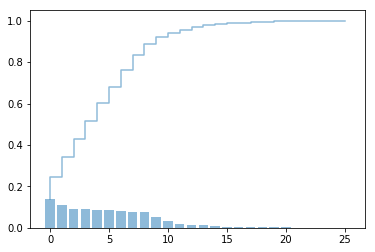

In [73]:
total_sum_eigenValues = sum(eig_val)
var_exp = [(i/total_sum_eigenValues) for i in sorted(eig_val,reverse=True)]
cum_var_exp = np.cumsum(var_exp) # This will show cumulative percentage of explained varaince for each feature
plt.bar(np.arange(len(eig_val)),var_exp,alpha=0.5,align='center',label='indivisual explained variance')
plt.step(np.arange(len(eig_val)),cum_var_exp,alpha=0.5,label='cumulative explained variance')
var_exp

In [74]:
var_exp_cum_var_exp_pairs = dict(zip(var_exp,cum_var_exp.T))
var_exp_cum_var_exp_pairs

{0.13796010234299094: 0.13796010234299094,
 0.10877449475359693: 0.24673459709658788,
 0.09282150161277837: 0.33955609870936626,
 0.08982402412371812: 0.42938012283308435,
 0.08826525643805108: 0.5176453792711354,
 0.08367732618217057: 0.601322705453306,
 0.08032497787476786: 0.6816476833280739,
 0.07804807195076383: 0.7596957552788377,
 0.07594952717410351: 0.8356452824529412,
 0.05332047269499769: 0.888965755147939,
 0.034245777838107165: 0.9232115329860461,
 0.018789208704212707: 0.9420007416902588,
 0.015054011270190515: 0.9570547529604494,
 0.013411251134402967: 0.9704660040948524,
 0.009041996877387467: 0.9795080009722399,
 0.005519422740591024: 0.9850274237128309,
 0.003397818819615381: 0.9884252425324463,
 0.0028882708763608676: 0.9913135134088072,
 0.002516253361954124: 0.9938297667707614,
 0.002275357023003422: 0.9961051237937648,
 0.0017092264220788724: 0.9978143502158436,
 0.0009256834214593916: 0.998740033637303,
 0.0008908214265690268: 0.9996308550638721,
 0.0001822246046

In [75]:
pca = PCA(n_components=14)

X_PCA = pca.fit_transform(X_PCA)

### ANN

In [76]:
model = models.Sequential()
model.add(layers.Dense(units=128,activation='relu',input_dim=14))
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

W1225 15:47:55.876450 14108 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1225 15:47:56.362634 14108 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1225 15:47:56.550837 14108 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


In [77]:
X_train_PCA,X_test_PCA,y_train,y_test = train_test_split(X_PCA,y_PCA,train_size=0.8,random_state=10)

In [78]:
'''y_train_NeuralNetworks = np.array(pd.get_dummies(y_train)).astype('float32')
y_test_NeuralNetworks = np.array(pd.get_dummies(y_test)).astype('float32')'''

"y_train_NeuralNetworks = np.array(pd.get_dummies(y_train)).astype('float32')\ny_test_NeuralNetworks = np.array(pd.get_dummies(y_test)).astype('float32')"

In [79]:
# Splitting the data into X_train_PCA and X_validation_PCA for training and Validation respectively
X_train_PCA_NeuralNetworks,X_validation_PCA,y_train_NeuralNetworks,y_validation = train_test_split(X_train_PCA,y_train,train_size=0.9,random_state=10)

In [80]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x=X_train_PCA_NeuralNetworks,y=y_train_NeuralNetworks,batch_size=5,epochs=50,validation_data=(X_validation_PCA,y_validation))


W1225 15:47:57.137924 14108 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1225 15:47:57.199396 14108 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1225 15:47:57.205025 14108 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1225 15:47:57.894195 14108 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 21716 samples, validate on 2413 samples
Epoch 1/50
21716/21716 [==============================] - 12s 555us/step - loss: 0.3495 - acc: 0.8380 - val_loss: 0.3437 - val_acc: 0.8305
Epoch 2/50
21716/21716 [==============================] - 8s 377us/step - loss: 0.3311 - acc: 0.8441 - val_loss: 0.3419 - val_acc: 0.8346
Epoch 3/50
21716/21716 [==============================] - 8s 386us/step - loss: 0.3272 - acc: 0.8460 - val_loss: 0.3402 - val_acc: 0.8330
Epoch 4/50
21716/21716 [==============================] - 8s 362us/step - loss: 0.3236 - acc: 0.8475 - val_loss: 0.3529 - val_acc: 0.8355
Epoch 5/50
21716/21716 [==============================] - 9s 402us/step - loss: 0.3225 - acc: 0.8496 - val_loss: 0.3446 - val_acc: 0.8338
Epoch 6/50
21716/21716 [==============================] - 11s 487us/step - loss: 0.3200 - acc: 0.8495 - val_loss: 0.3475 - val_acc: 0.8264
Epoch 7/50
21716/21716 [==============================] - 10s 455us/step - loss: 0.3181 - acc: 0.8491 - val_loss: 0.3381 

In [81]:
prediction = model.predict(X_test_PCA)

prediction = np.around(prediction)

In [82]:
prediction

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [83]:
y_pred_ann = prediction
y_test_ann = y_test

In [84]:
accuracy_score(y_test_ann,y_pred_ann)

0.8317586606994861

In [85]:
confusion_matrix(y_test_ann,y_pred_ann)

array([[4070,  439],
       [ 576,  948]], dtype=int64)

# Metrics computed from a confusion matrix

In [86]:
# save confusion matrix and slice into four pieces
confusion_lr = confusion_matrix(y_test_lr, y_pred_lr)
print("Confusion Matrix for Logistic Regression: \n {} \n\n".format(confusion_lr))
#[row, column]
TP_lr = confusion_lr[1, 1]
TN_lr = confusion_lr[0, 0]
FP_lr = confusion_lr[0, 1]
FN_lr = confusion_lr[1, 0]


confusion_randomForest = confusion_matrix(y_test_rf, y_pred_rf)
print("Confusion Matrix for Random Forest Classifier: \n {} \n\n".format(confusion_randomForest))
#[row, column]
TP_rf = confusion_randomForest[1, 1]
TN_rf = confusion_randomForest[0, 0]
FP_rf = confusion_randomForest[0, 1]
FN_rf = confusion_randomForest[1, 0]



confusion_ann = confusion_matrix(y_test_ann, y_pred_ann)
print("Confusion Matrix for Artificial Neural Network Classifier: \n {} \n\n".format(confusion_ann))
#[row, column]
TP_ann = confusion_ann[1, 1]
TN_ann = confusion_ann[0, 0]
FP_ann = confusion_ann[0, 1]
FN_ann = confusion_ann[1, 0]

Confusion Matrix for Logistic Regression: 
 [[4189  320]
 [ 645  879]] 


Confusion Matrix for Random Forest Classifier: 
 [[4241  268]
 [ 556  968]] 


Confusion Matrix for Artificial Neural Network Classifier: 
 [[4070  439]
 [ 576  948]] 




### Classification Accuracy

In [87]:
# use float to perform true division, not integer division
print("Accuracy for Logistic Regression Classifier: {} \n\n".format((TP_lr + TN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr)))

# use float to perform true division, not integer division
print("Accuracy for Random Forest Classifier: {} \n\n".format((TP_rf + TN_rf) / float(TP_rf + TN_rf + FP_rf + FN_rf)))

# use float to perform true division, not integer division
print("Accuracy for Artificial Neural Network Classifier: {} \n\n".format((TP_ann + TN_ann) / float(TP_ann + TN_ann + FP_ann + FN_ann)))

Accuracy for Logistic Regression Classifier: 0.840046411403945 


Accuracy for Random Forest Classifier: 0.8634178683905188 


Accuracy for Artificial Neural Network Classifier: 0.8317586606994861 




### Classification Error

In [88]:
print("Error for Logistic Regression Classifier: {} \n\n".format((FP_lr + FN_lr) / float(TP_lr + TN_lr + FP_lr + FN_lr)))

print("Error for Random Forest Classifier: {} \n\n".format((FP_rf + FN_rf) / float(TP_rf + TN_rf + FP_rf + FN_rf)))

print("Error for Artificial Neural Network Classifier: {} \n\n".format((FP_ann + FN_ann) / float(TP_ann + TN_ann + FP_ann + FN_ann)))

Error for Logistic Regression Classifier: 0.15995358859605502 


Error for Random Forest Classifier: 0.13658213160948118 


Error for Artificial Neural Network Classifier: 0.16824133930051385 




### Sensitivity

#### Meaning:  When the actual value is positive, how often is the prediction correct?
#### Something we want to maximize
#### How "sensitive" is the classifier to detecting positive instances?
#### Also known as "True Positive Rate" or "Recall"
#### TP / all positive
#### all positive = TP + FN

In [89]:
print("Senstivity of Logistic Regression Classfier : {} \n\n".format(TP_lr / float(FN_lr + TP_lr)))

print("Senstivity of Random Forest Classifier : {} \n\n".format(TP_rf / float(FN_rf + TP_rf)))

print("Senstivity of Artificial Neural Network Classifier : {} \n\n".format(TP_ann / float(FN_ann + TP_ann)))

Senstivity of Logistic Regression Classfier : 0.5767716535433071 


Senstivity of Random Forest Classifier : 0.6351706036745407 


Senstivity of Artificial Neural Network Classifier : 0.6220472440944882 




### Specificity

#### Meaning : When the actual value is negative, how often is the prediction correct?

#### Something we want to maximize
#### How "specific" (or "selective") is the classifier in predicting positive instances?
#### TN / all negative
#### all negative = TN + FP

In [90]:
print("specificity of Logistic Regression Classfier : {} \n\n".format(TN_lr / (TN_lr + FP_lr)))

print("specificity of Random Forest Classifier : {} \n\n".format(TN_rf / (TN_rf + FP_rf)))

print("specificity of Artificial Neural Network Classifier : {} \n\n".format(TN_ann / (TN_ann + FP_ann)))

specificity of Logistic Regression Classfier : 0.9290308272344201 


specificity of Random Forest Classifier : 0.9405633178088267 


specificity of Artificial Neural Network Classifier : 0.9026391661122201 




# Adjusting the threshold of classifier using ROC curve

In [91]:
y_pred_prob = best_model_logistic_regression.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

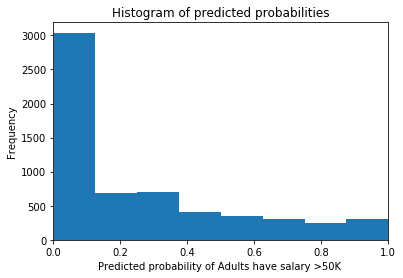

In [92]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Adults have salary >50K ')
plt.ylabel('Frequency')

According to above histogram, around 3000 adults have probabilty 0 - 0.1  and less that 500 adults have probabilty of 0.38 - 0.5 of having salary > 50K

It means threshold has to be made lower than 0.5 to favour more adults having salary >50K 

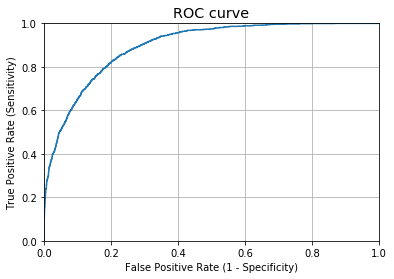

In [93]:
fpr, tpr, thresholds = roc_curve(y_test_lr, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

From above graph, choose the approximate threshold where the sensitivity is as high as possible and (1-Specificity) is as low as possible 

In [94]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [95]:
threshold = 0.28

In [96]:
evaluate_threshold(threshold)

Sensitivity: 0.8149606299212598
Specificity: 0.8059436682191173


In [97]:
# predict Salary if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above threshold and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize([y_pred_prob], threshold)[0]

In [98]:
confusion_matrix_after_adjustment = confusion_matrix(y_test_lr,y_pred_class)
confusion_matrix_after_adjustment

array([[3631,  878],
       [ 282, 1242]], dtype=int64)

In [99]:
accuracy_score(y_test_lr,y_pred_class)

0.8077241836565556

In [100]:
TP_new = confusion_matrix_after_adjustment[1, 1]
TN_new = confusion_matrix_after_adjustment[0, 0]
FP_new = confusion_matrix_after_adjustment[0, 1]
FN_new = confusion_matrix_after_adjustment[1, 0]

In [101]:
print("Accuracy for Logistic Regression Classifier with threshold {} : {} \n\n".format(threshold,(TP_new + TN_new) / float(TP_new + TN_new + FP_new + FN_new)))

print("Senstivity of Logistic Regression Classfier with threshold {} : {} \n\n".format(threshold,TP_new / float(FN_new + TP_new)))

print("specificity of Logistic Regression Classfier with threshold {} : {} \n\n".format(threshold,TN_new / (TN_new + FP_new)))

Accuracy for Logistic Regression Classifier with threshold 0.28 : 0.8077241836565556 


Senstivity of Logistic Regression Classfier with threshold 0.28 : 0.8149606299212598 


specificity of Logistic Regression Classfier with threshold 0.28 : 0.80527833222444 




# Using Adaboost Classifier

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [121]:
abc = AdaBoostClassifier()

In [122]:
# Fit
abc.fit(X_train, y_train)

# Predict
y_pred = abc.predict(X_test)

# Accuracy
accuracy_score(y_pred, y_test)

0.8622575832918946

In [123]:
confusion_matrix_abc = confusion_matrix(y_pred,y_test)

In [124]:
TP_abc = confusion_matrix_abc[1, 1]
TN_abc = confusion_matrix_abc[0, 0]
FP_abc = confusion_matrix_abc[0, 1]
FN_abc = confusion_matrix_abc[1, 0]

In [125]:
print("Accuracy for Adaboost Classifier : {} \n\n".format((TP_abc + TN_abc) / float(TP_abc + TN_abc + FP_abc + FN_abc)))

print("Senstivity of Adaboost Classfier : {} \n\n".format(TP_abc / float(FN_abc + TP_abc)))

print("specificity of Adaboost Classfier : {} \n\n".format(TN_abc / (TN_abc + FP_abc)))

Accuracy for Adaboost Classifier : 0.8622575832918946 


Senstivity of Adaboost Classfier : 0.781021897810219 


specificity of Adaboost Classfier : 0.883125 




# XG Boost Classifier

In [109]:
import xgboost as xgb

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [111]:
xg = xgb.XGBClassifier(random_state=0)

In [112]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [113]:
y_pred = xg.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred)

0.8654069285595889

In [116]:
confusion_xgboost = confusion_matrix(y_test,y_pred)

In [117]:
TP_xgboost = confusion_xgboost[1, 1]
TN_xgboost = confusion_xgboost[0, 0]
FP_xgboost = confusion_xgboost[0, 1]
FN_xgboost = confusion_xgboost[1, 0]

In [118]:
print("Accuracy for XG Boost Classifier : {} \n\n".format((TP_xgboost + TN_xgboost) / float(TP_xgboost + TN_xgboost + FP_xgboost + FN_xgboost)))

print("Senstivity of XG Boost Classfier : {} \n\n".format(TP_xgboost / float(FN_xgboost + TP_xgboost)))

print("Specificity of XG Boost Classfier : {} \n\n".format(TN_xgboost / (TN_xgboost + FP_xgboost)))

Accuracy for XG Boost Classifier : 0.8654069285595889 


Senstivity of XG Boost Classfier : 0.6240157480314961 


Specificity of XG Boost Classfier : 0.9469948990907074 


